In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [ ]:
# Load dataset (update the file path)
data = pd.read_csv('/content/drive/MyDrive/techaxis/student-mat.csv')

In [ ]:
print(data.head())

  school sex  age address famsize Parrent_status  Mother_edu  Father_edu  \
0     GP   F   18       U     GT3              A           4           4   
1     GP   F   17       U     GT3              T           1           1   
2     GP   F   15       U     LE3              T           1           1   
3     GP   F   15       U     GT3              T           4           2   
4     GP   F   16       U     GT3              T           3           3   

  Mother_job Father_job  ... Family_quality_reln freetime_after_school  \
0    at_home    teacher  ...                   4                     3   
1    at_home      other  ...                   5                     3   
2    at_home      other  ...                   4                     3   
3     health   services  ...                   3                     2   
4      other      other  ...                   4                     3   

   goout_with_friends  workday_alcohol_consum  weekend_alcohol_consum  \
0                   4    

In [ ]:
print("Columns in dataset:", data.columns.tolist())

Columns in dataset: ['school', 'sex', 'age', 'address', 'famsize', 'Parrent_status', 'Mother_edu', 'Father_edu', 'Mother_job', 'Father_job', 'reason_to_chose_school', 'guardian', 'traveltime', 'weekly_studytime', 'failures', 'extra_edu_supp', 'family_edu_supp', 'extra_paid_class', 'extra_curr_activities', 'nursery', 'Interested_in_higher_edu', 'internet_access', 'romantic_relationship', 'Family_quality_reln', 'freetime_after_school', 'goout_with_friends', 'workday_alcohol_consum', 'weekend_alcohol_consum', 'health_status', 'absences', 'G1', 'G2', 'G3']


In [ ]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 school                      0
sex                         0
age                         0
address                     0
famsize                     0
Parrent_status              0
Mother_edu                  0
Father_edu                  0
Mother_job                  0
Father_job                  0
reason_to_chose_school      0
guardian                    0
traveltime                  0
weekly_studytime            0
failures                    0
extra_edu_supp              0
family_edu_supp             0
extra_paid_class            0
extra_curr_activities       0
nursery                     0
Interested_in_higher_edu    0
internet_access             0
romantic_relationship       0
Family_quality_reln         0
freetime_after_school       0
goout_with_friends          0
workday_alcohol_consum      0
weekend_alcohol_consum      0
health_status               0
absences                    0
G1                          0
G2                          0
G3                     

In [ ]:
# Verify data types
print("Data types:\n", data.dtypes)

Data types:
 school                      object
sex                         object
age                          int64
address                     object
famsize                     object
Parrent_status              object
Mother_edu                   int64
Father_edu                   int64
Mother_job                  object
Father_job                  object
reason_to_chose_school      object
guardian                    object
traveltime                   int64
weekly_studytime             int64
failures                     int64
extra_edu_supp              object
family_edu_supp             object
extra_paid_class            object
extra_curr_activities       object
nursery                     object
Interested_in_higher_edu    object
internet_access             object
romantic_relationship       object
Family_quality_reln          int64
freetime_after_school        int64
goout_with_friends           int64
workday_alcohol_consum       int64
weekend_alcohol_consum       int64
health_

In [ ]:
# Define target
target = 'G3'

# List of expected categorical columns (from standard student-mat.csv)
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                    'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                    'nursery', 'higher', 'internet', 'romantic']

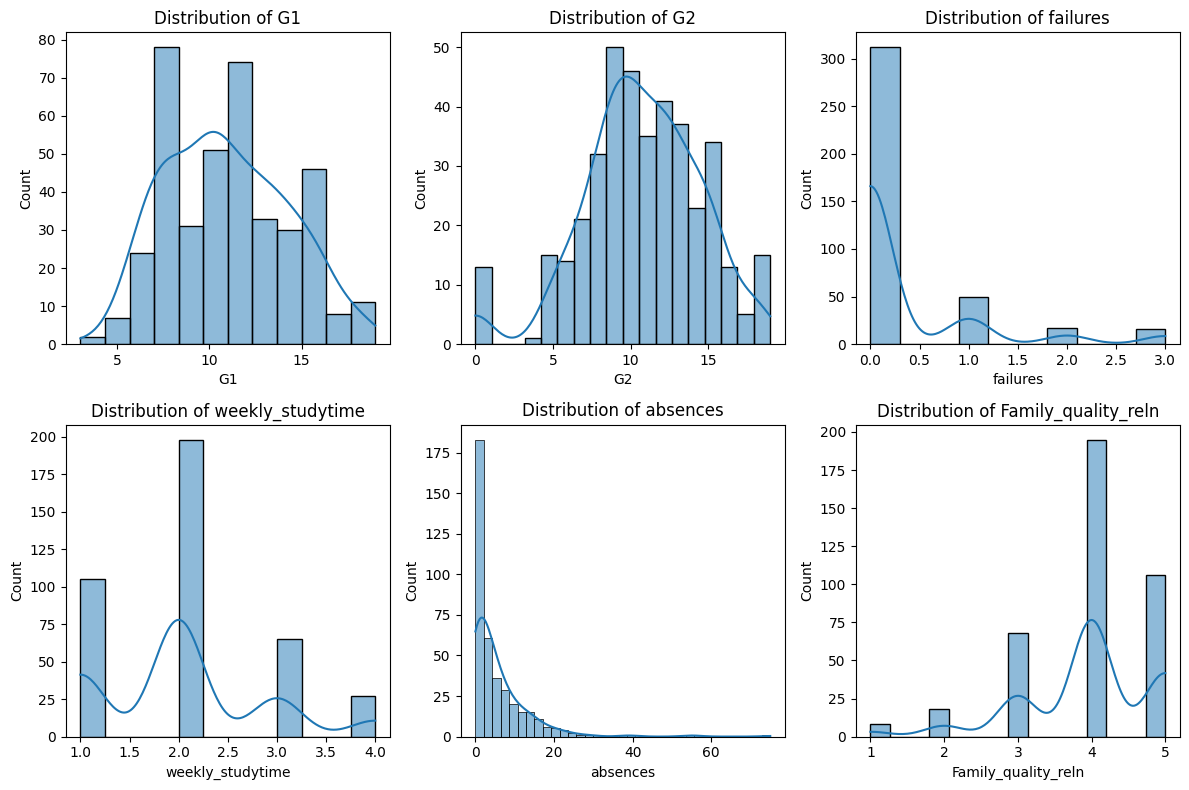

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features
numerical_features = ['G1', 'G2', 'failures', 'weekly_studytime', 'absences', 'Family_quality_reln']

# Plot histograms
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=data, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [ ]:
# Filter to only use columns present in the dataset
available_categorical_cols = [col for col in categorical_cols if col in data.columns]
print(f"Available categorical columns: {available_categorical_cols}")
missing_cols = [col for col in categorical_cols if col not in data.columns]
if missing_cols:
    print(f"Warning: These categorical columns are missing: {missing_cols}")


Available categorical columns: ['school', 'sex', 'address', 'famsize', 'guardian', 'nursery']


In [ ]:
# Encode available categorical variables
data_encoded = pd.get_dummies(data, columns=available_categorical_cols, drop_first=True)


In [ ]:
# Select relevant numerical features
relevant_features = ['G1', 'G2', 'failures', 'studytime', 'absences', 'famrel']

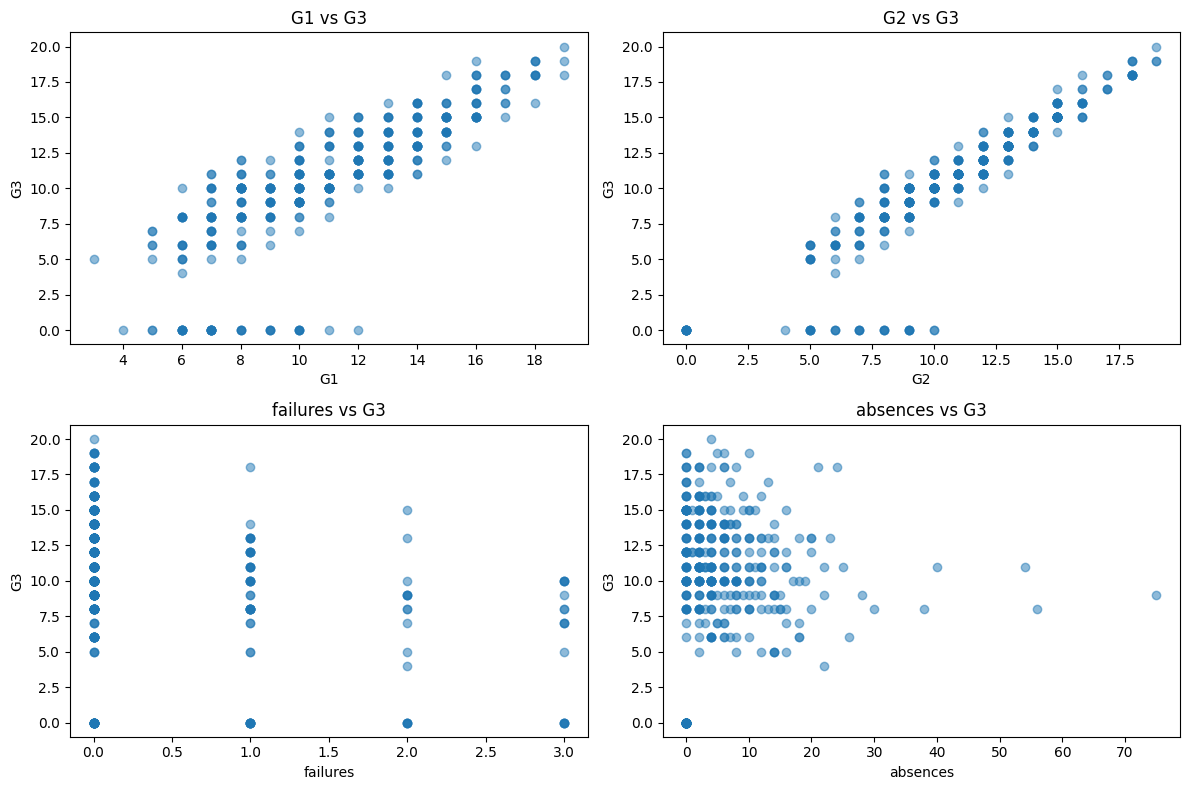

In [ ]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['G1', 'G2', 'failures', 'absences'], 1):
    plt.subplot(2, 2, i)
    plt.scatter(data[feature], data['G3'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('G3')
    plt.title(f'{feature} vs G3')
plt.tight_layout()
plt.show()

In [ ]:
# Check for missing features
missing_features = [feat for feat in relevant_features if feat not in data_encoded.columns]
if missing_features:
    print(f"Warning: These features are missing: {missing_features}")
    relevant_features = [feat for feat in relevant_features if feat in data_encoded.columns]
else:
    print("All relevant features are present.")

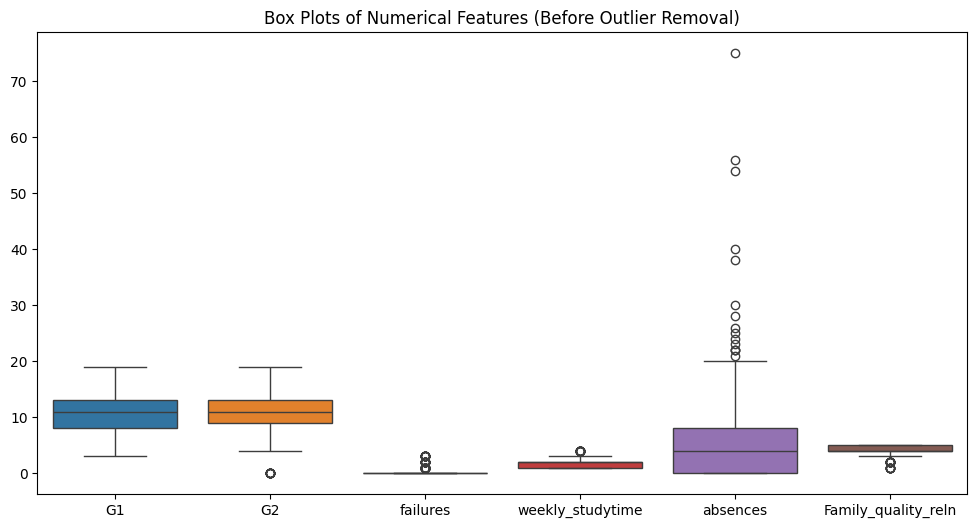

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_features])
plt.title('Box Plots of Numerical Features (Before Outlier Removal)')
plt.show()

In [ ]:
# Define function to remove outliers using IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers from relevant features
print(f"Original dataset shape: {data_encoded.shape}")
data_cleaned = remove_outliers(data_encoded, relevant_features)
print(f"Dataset shape after removing outliers: {data_cleaned.shape}")

Original dataset shape: (395, 34)
Dataset shape after removing outliers: (290, 34)


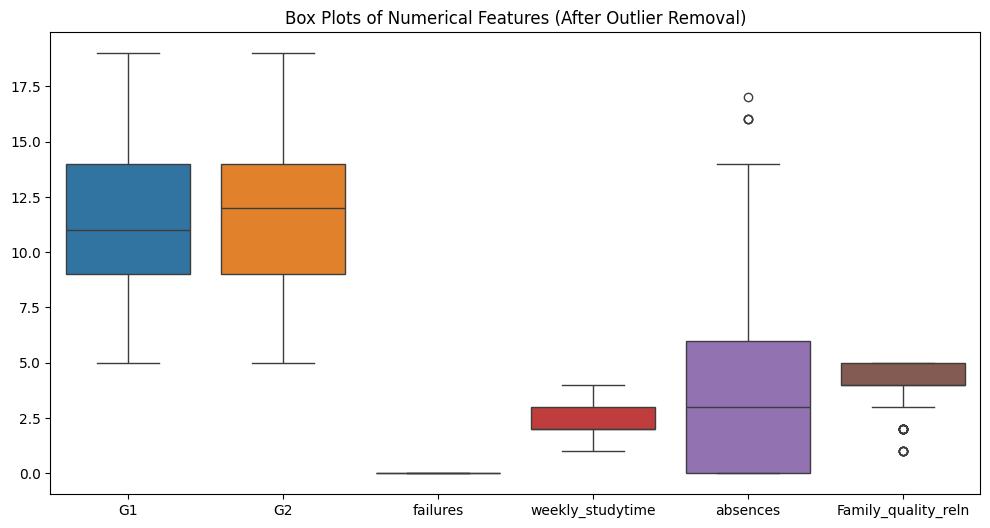

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_cleaned[numerical_features])
plt.title('Box Plots of Numerical Features (After Outlier Removal)')
plt.show()

In [ ]:
# Define features (X) and target (y)
X = data_cleaned[relevant_features]
y = data_cleaned[target]


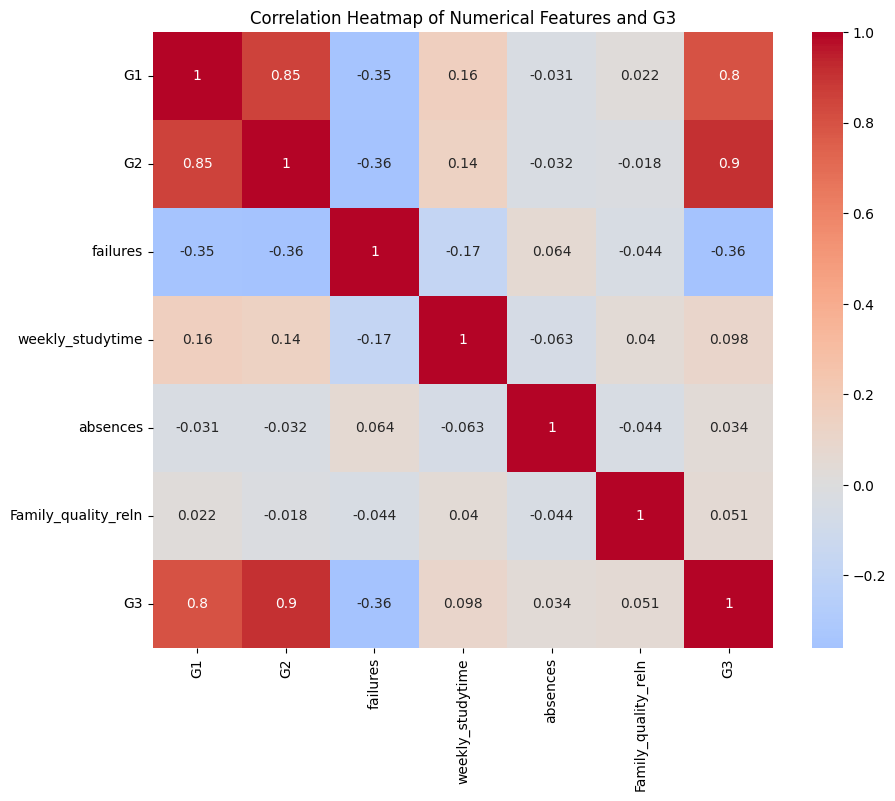

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_features + ['G3']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features and G3')
plt.show()

In [ ]:
# Handle missing values
X = X.fillna(X.mean())
y = y.fillna(y.mean())

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (232, 4)
Testing set shape: (58, 4)


In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score:", r2)


Root Mean Squared Error (RMSE): 1.4822295888348935
R-squared Score: 0.8514994611160481


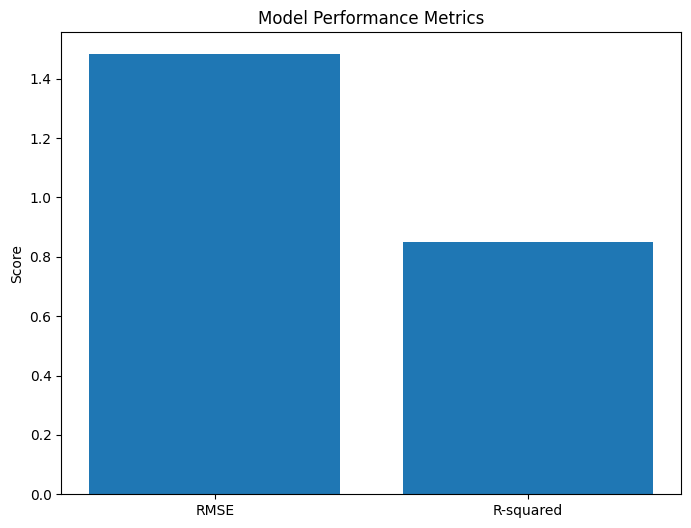

In [ ]:
metrics = {'RMSE': 1.4822, 'R-squared': 0.8515}
plt.figure(figsize=(8, 6))
plt.bar(list(metrics.keys()), list(metrics.values()))
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.show()

In [ ]:
# Example for binary classification with a threshold of 0.5
y_pred_class = (y_pred >= 0.5).astype(int)  # Assumes y_pred is probabilities
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy)

Accuracy: 0.0


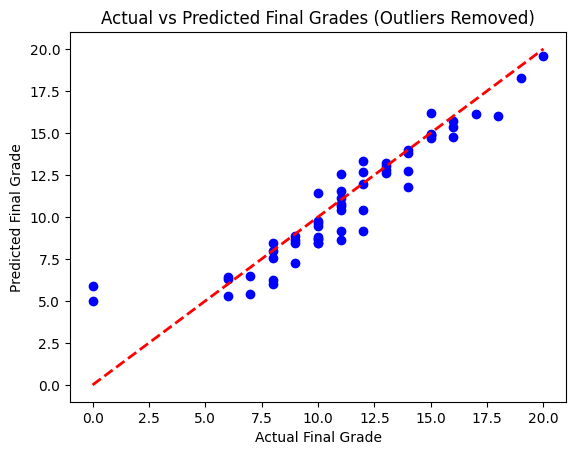

In [ ]:
# Plot actual vs predicted
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Final Grade')
plt.ylabel('Predicted Final Grade')
plt.title('Actual vs Predicted Final Grades (Outliers Removed)')
plt.show()


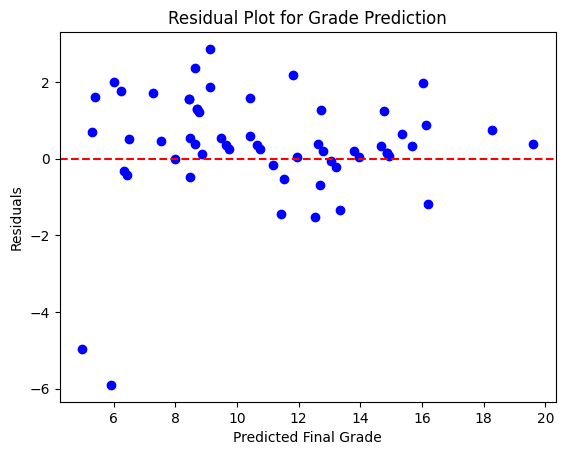

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Final Grade')
plt.ylabel('Residuals')
plt.title('Residual Plot for Grade Prediction')
plt.show()

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': relevant_features,
    'Coefficient': model.coef_
})
print(feature_importance.sort_values(by='Coefficient', ascending=False))


    Feature  Coefficient
1        G2     1.015804
0        G1     0.090927
3  absences     0.082176
2  failures     0.000000


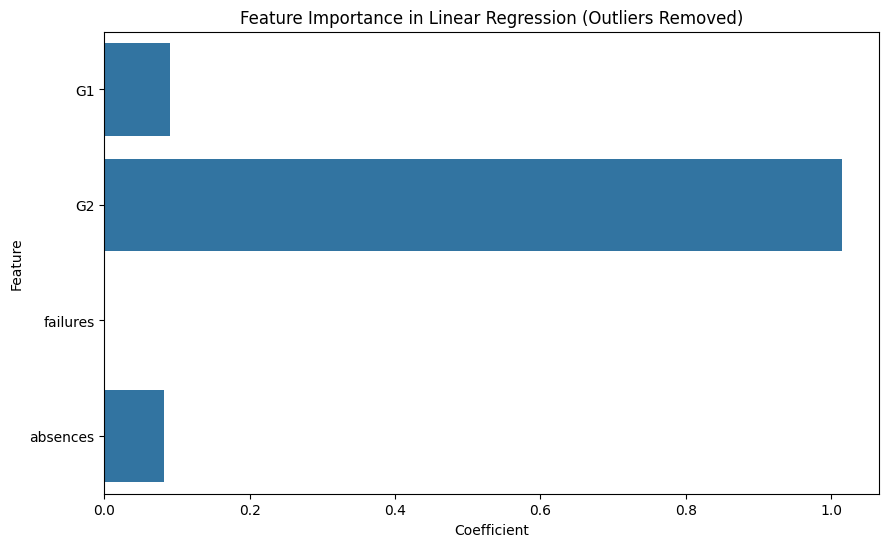

In [ ]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance in Linear Regression (Outliers Removed)')
plt.show()

In [ ]:
import joblib

# Save the model to Google Drive
model_path = '/content/drive/MyDrive/student_grade_model3.pkl'
joblib.dump(model, model_path)
print(f"Model saved to {model_path}")

# Optionally, download the file to your local machine
from google.colab import files
files.download(model_path)

Model saved to /content/drive/MyDrive/student_grade_model3.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib

# Specify the path to your model file
model_path = '/content/drive/MyDrive/student_grade_model3.pkl'  # Adjust based on your file location
try:
    # Load the model
    model = joblib.load(model_path)
    print("Model loaded successfully!")

    # Print the coefficients to infer feature order
    print("Coefficients:", model.coef_)
    # The number of coefficients should match the number of features, and their order should correspond to ['G1', 'G2', 'failures', 'weekly_studytime', 'absences', 'Family_quality_reln']

    # If the number of coefficients matches, assume the features and create a DataFrame
    assumed_features = ['G1', 'G2', 'failures', 'weekly_studytime', 'absences', 'Family_quality_reln']
    if len(model.coef_) == len(assumed_features):
        feature_importance = pd.DataFrame({
            'Feature': assumed_features,
            'Coefficient': model.coef_
        })
        print("\nFeature Importance:")
        print(feature_importance)
    else:
        print("Number of coefficients does not match assumed features. Check feature order or names.")

except FileNotFoundError:
    print("Model file not found. Ensure the path is correct.")
except Exception as e:
    print(f"Error loading model: {e}")

Model loaded successfully!
Coefficients: [0.09092701 1.01580353 0.         0.08217588]
Number of coefficients does not match assumed features. Check feature order or names.
